In [79]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("shivam2503/diamonds")

# print("Path to dataset files:", path)

In [ ]:
import pandas as pd


In [89]:
df = pd.read_csv('diamonds.csv')

df=df.drop(columns="Unnamed: 0")
##one hot encoding
#df = pd.get_dummies(df, ['cut', 'color', 'clarity'], drop_first=True, dtype=int)

cut_map = {
    "Fair" :1,
    "Good" :2,
    "Premium": 3,
    "Very Good": 4,
    "Ideal" : 5,
}

color_map = {
    "J" : 1,
    "I" : 2,    
    "H" : 3,    
    "F" : 4,    
    "G" : 5,    
    "E" : 6,    
    "D" : 7   
}

clarity_map = {
    "I1" : 1,
    "SI2" : 2,
    "SI1" : 3,
    "VS2" : 4,
    "VS1" : 5,
    "VVS2" : 6,
    "VVS1" : 7,
    "IF" : 8
}

df['cut'] = df['cut'].map(cut_map)
df['color'] = df['color'].map(color_map)
df['clarity'] = df['clarity'].map(clarity_map)

df['volume'] = df['x'] * df['y'] * df['z']
df = df.drop(columns=['x', 'y', 'z'])

df.head(10)

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,6,2,61.5,55.0,326,38.202030
1,0.21,3,6,3,59.8,61.0,326,34.505856
2,0.23,2,6,5,56.9,65.0,327,38.076885
3,0.29,3,2,4,62.4,58.0,334,46.724580
4,0.31,2,1,2,63.3,58.0,335,51.917250
5,0.24,4,1,6,62.8,57.0,336,38.693952
6,0.24,4,2,7,62.3,57.0,336,38.830870
7,0.26,4,3,3,61.9,55.0,337,42.321081
8,0.22,1,6,4,65.1,61.0,337,36.425214
9,0.23,4,3,5,59.4,61.0,338,38.718000


Index(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='str')

In [90]:
subset = df[(df["carat"] > 0.9) & (df["carat"] < 1.1)]
print(subset.groupby("cut")["price"].mean().sort_values())
print(subset.groupby("color")["price"].mean().sort_values())
print(subset.groupby("clarity")["price"].mean().sort_values())

cut
1    3976.186335
2    4866.170325
3    5180.003609
4    5438.815789
5    5911.679002
Name: price, dtype: float64
color
1    3652.728291
2    4087.163077
3    4613.282178
5    5642.214769
4    5654.970471
6    5721.374051
7    6027.636095
Name: price, dtype: float64
clarity
1     2698.492308
2     4111.526094
3     4801.350198
4     5840.741822
5     6453.990506
6     8257.900000
7     8841.398876
8    11096.720930
Name: price, dtype: float64


In [91]:
df.tail()

,carat,cut,color,clarity,depth,table,price,volume
53935,0.72,5,7,3,60.8,57.0,2757,115.920000
53936,0.72,2,7,3,63.1,55.0,2757,118.110175
53937,0.70,4,7,3,62.8,60.0,2757,114.449728
53938,0.86,3,3,2,61.0,58.0,2757,140.766120
53939,0.75,5,7,2,62.2,55.0,2757,124.568444


In [35]:
df.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
33939,33940,0.27,Ideal,H,VS1,61.2,54.0,464,4.20,4.23,2.58
1951,1952,0.75,Ideal,E,VS1,61.8,55.0,3086,5.85,5.87,3.62
28206,28207,0.38,Ideal,G,SI1,61.3,56.0,666,4.63,4.67,2.85
33098,33099,0.40,Ideal,H,VS1,61.1,57.0,815,4.74,4.78,2.91
18854,18855,1.22,Premium,G,VS2,61.2,58.0,7729,6.81,6.91,4.20


## x length in mm (0--10.74)

## y width in mm (0--58.9)

## z depth in mm (0--31.8) 

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [28]:
df.filter(regex="cut_").columns

Index(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good'], dtype='str')

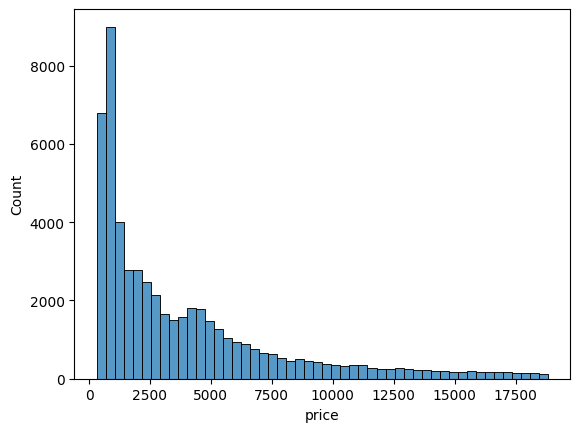

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["price"], bins=50)
plt.show()

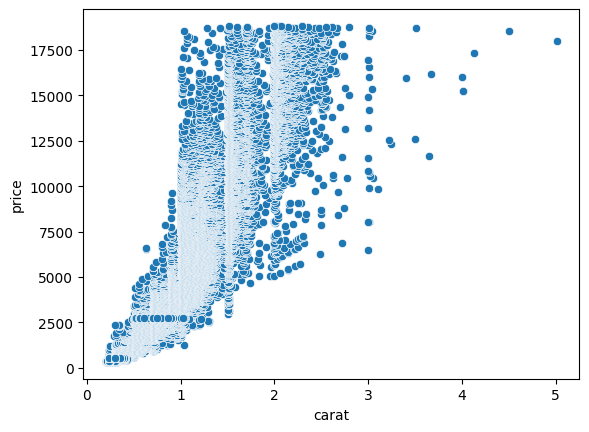

In [92]:
sns.scatterplot(x="carat", y="price", data=df)
plt.show()

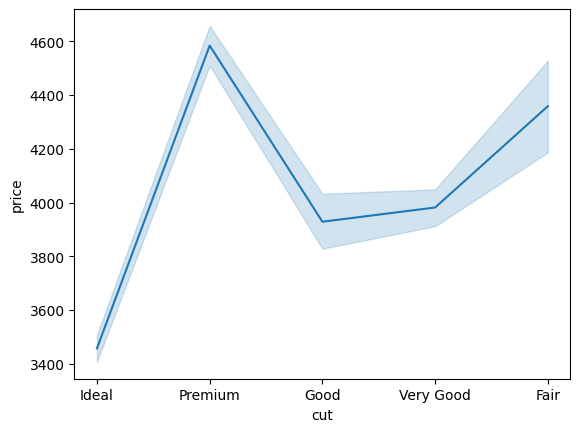

In [42]:
sns.lineplot(x="cut", y="price", data=df)
plt.show()

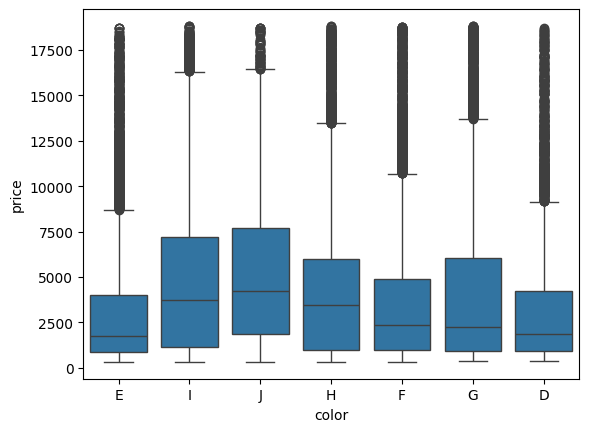

In [41]:
sns.boxplot(x="color", y="price", data=df)
plt.show()

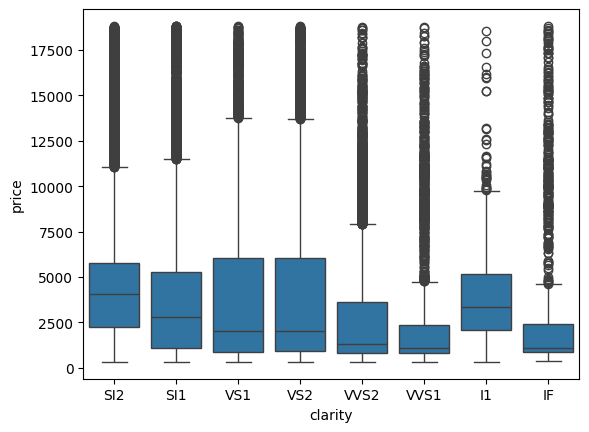

In [83]:
sns.boxplot(x="clarity", y="price", data=df)
plt.show()

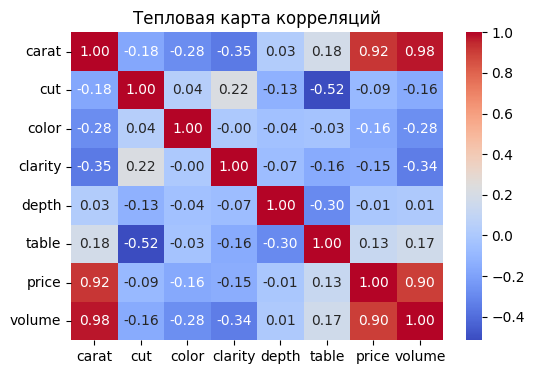

In [93]:
# Тепловая карта корреляций
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Тепловая карта корреляций')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
ш
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
y = np.log1p(df["price"])

X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Нормализация
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=[keras.metrics.RootMeanSquaredError(name="rmse"),
             keras.metrics.MeanAbsoluteError(name="mae")]
)

2026-02-24 19:36:08.849120: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-24 19:36:08.860987: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-24 19:36:09.361029: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-24 19:36:11.721662: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

Epoch 1/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 31125122.0000 - val_loss: 32064536.0000
Epoch 2/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 30171836.0000 - val_loss: 30682278.0000
Epoch 3/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 28470924.0000 - val_loss: 28692522.0000
Epoch 4/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 26370900.0000 - val_loss: 26443926.0000
Epoch 5/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 24135894.0000 - val_loss: 24152196.0000
Epoch 6/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 21942596.0000 - val_loss: 21977774.0000
Epoch 7/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 19955978.0000 - val_loss: 20079536.0000
Epoch 8/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 18321886.0000 - val_loss: 18588512.0000
Epoch 9/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 17128530.0000 - val_loss: 17555958.0000
Epoch 10/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 16385482.0000 - val

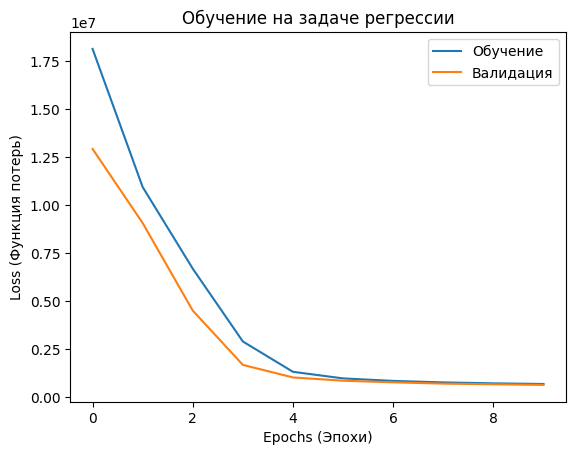

In [92]:
# График обучения
plt.plot(history.history['loss'], label='Обучение')
plt.plot(history.history['val_loss'], label='Валидация')
plt.title('Обучение на задаче регрессии')
plt.xlabel('Epochs (Эпохи)')
plt.ylabel('Loss (Функция потерь)')
plt.legend()
plt.show()

In [93]:
# Оценка модели на тестовых данных
test_loss = model.evaluate(X_test, y_test)
print(f"Метрика средней квадратичной ошибки (MSE): {test_loss}")

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 674166.4375
Метрика средней квадратичной ошибки (MSE): 674166.4375


In [94]:
preds = model.predict(X_test)
print(preds)

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[  407.5115 ]
 [ 3568.7917 ]
 [ 1247.1112 ]
 ...
 [  857.18243]
 [10495.59   ]
 [ 3441.8313 ]]
